In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_dir = 'dataset'  # Diretório contendo as imagens originais organizadas por classes
output_dir = 'mascaras_binarias'  # Diretório para salvar as máscaras binárias

In [2]:
def segment_object(image):
    """
    Segmenta o objeto do fundo de uma imagem e gera uma máscara binária (0 para o fundo, 1 para o objeto).

    Args:
        image (numpy array): Imagem carregada em escala de cinza.

    Returns:
        numpy array: Máscara binária da imagem.
    """
    # Aplicar o método de limiarização Otsu para segmentar o objeto
    _, binary_mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Normalizar a máscara binária para ter valores 0 e 1
    binary_mask_normalized = binary_mask // 255
    
    return binary_mask_normalized

In [3]:
def process_dataset(input_dir, output_dir):
    """
    Processa todas as imagens de um dataset, gerando máscaras binárias para cada imagem e salvando em uma nova pasta.

    Args:
        input_dir (str): Caminho para o diretório de entrada com as imagens originais.
        output_dir (str): Caminho para o diretório de saída para salvar as máscaras binárias.
    """
    # Criar a pasta de saída, se não existir
    os.makedirs(output_dir, exist_ok=True)
    
    for root, dirs, files in os.walk(input_dir):
        for filename in files:
            if filename.lower().endswith(('.png')):
                img_path = os.path.join(root, filename)
                
                # Carregar a imagem em escala de cinza
                image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                
                # Verificar se a imagem foi carregada corretamente
                if image is None:
                    print(f"Erro ao carregar a imagem: {img_path}")
                    continue

                # Gerar a máscara binária
                binary_mask = segment_object(image)
                
                # Gerar o caminho da pasta de saída correspondente
                relative_path = os.path.relpath(root, input_dir)
                output_folder = os.path.join(output_dir, relative_path)
                os.makedirs(output_folder, exist_ok=True)
                
                # Salvar a máscara binária na pasta de saída
                output_filename = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_mask.png")
                cv2.imwrite(output_filename, binary_mask * 255)  # Salvar com valores 0 e 255 para visualização
                print(f'Máscara binária salva: {output_filename}')


In [4]:
process_dataset(input_dir, output_dir)

Máscara binária salva: mascaras_binarias\corkscrew\0-01-V1-B_mask.png
Máscara binária salva: mascaras_binarias\corkscrew\0-01-V1-W_mask.png
Máscara binária salva: mascaras_binarias\corkscrew\0-01-V2-B_mask.png
Máscara binária salva: mascaras_binarias\corkscrew\0-01-V2-W_mask.png
Máscara binária salva: mascaras_binarias\dinner_plate\1-02-V1-B_mask.png
Máscara binária salva: mascaras_binarias\dinner_plate\1-02-V1-W_mask.png
Máscara binária salva: mascaras_binarias\dinner_plate\1-02-V2-B_mask.png
Máscara binária salva: mascaras_binarias\dinner_plate\1-02-V2-W_mask.png
Máscara binária salva: mascaras_binarias\fork\2-03-V1-B_mask.png
Máscara binária salva: mascaras_binarias\fork\2-03-V1-W_mask.png
Máscara binária salva: mascaras_binarias\fork\2-03-V2-B_mask.png
Máscara binária salva: mascaras_binarias\fork\2-03-V2-W_mask.png
Máscara binária salva: mascaras_binarias\glass\3-04-V1-B_mask.png
Máscara binária salva: mascaras_binarias\glass\3-04-V1-W_mask.png
Máscara binária salva: mascaras_bina

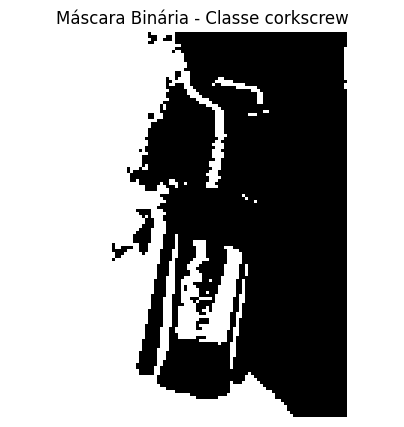

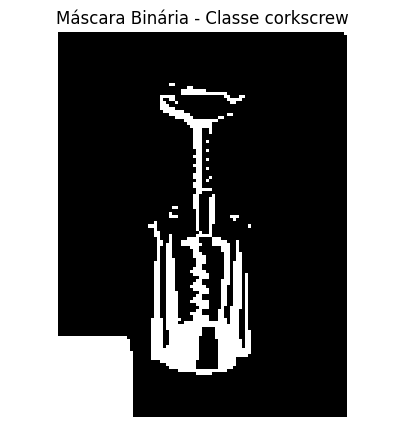

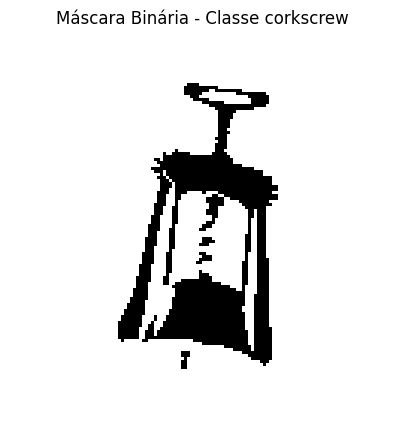

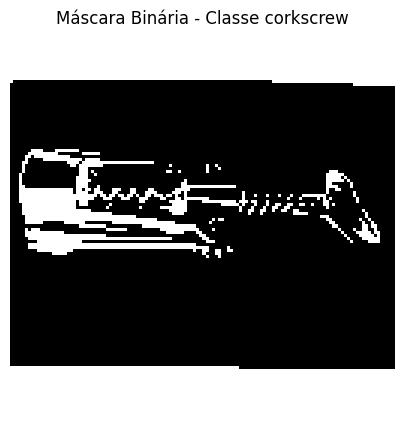

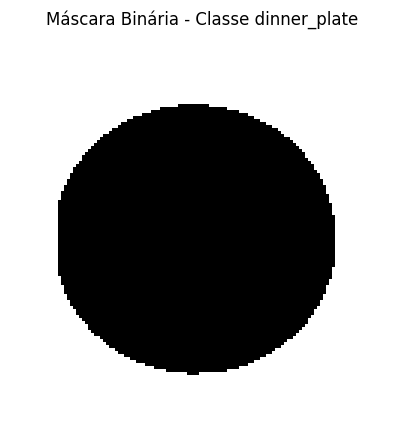

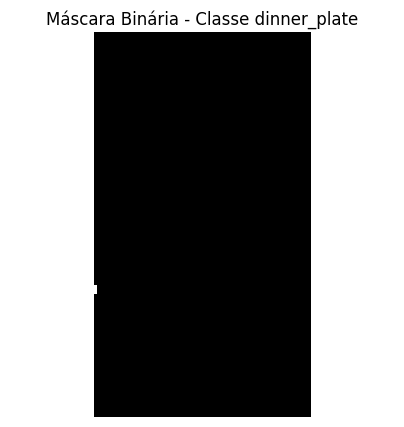

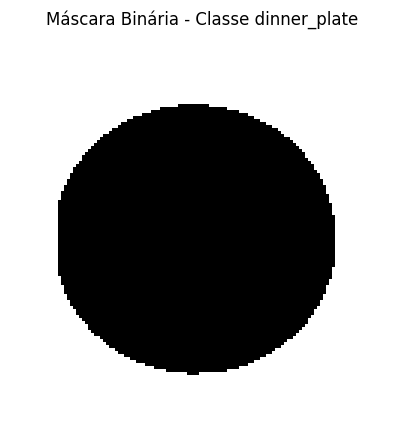

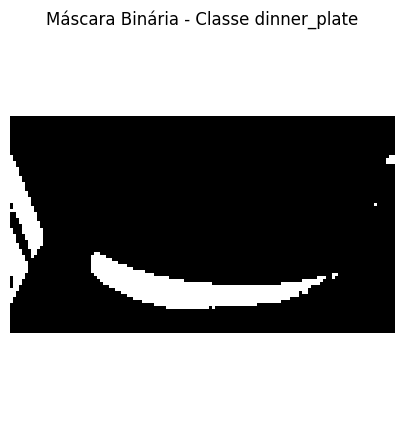

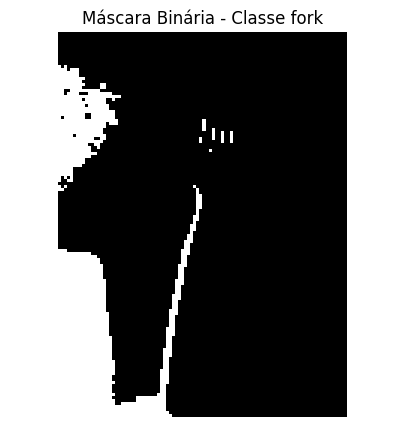

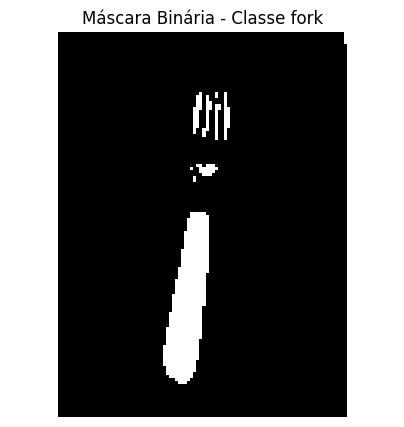

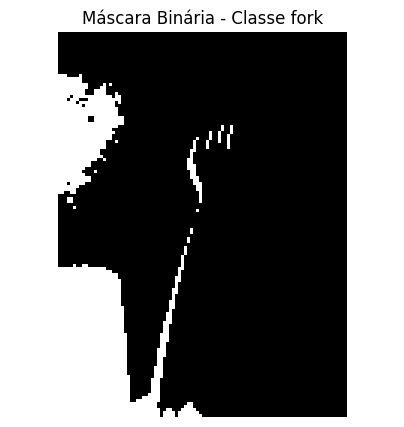

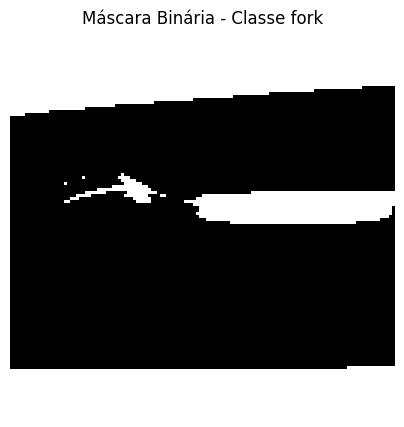

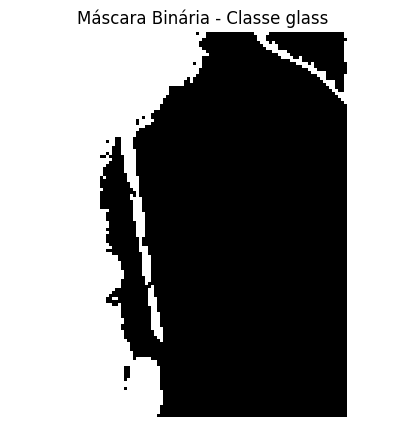

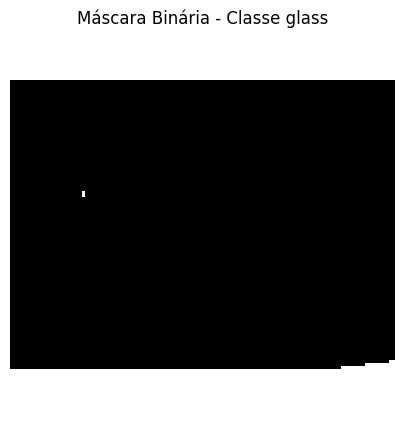

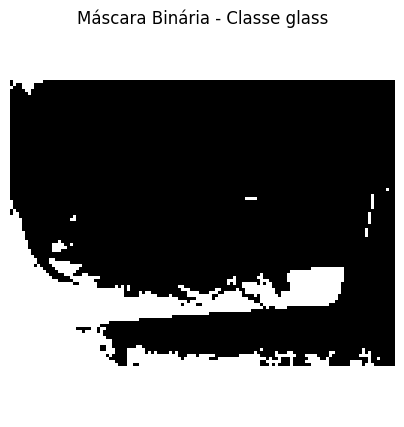

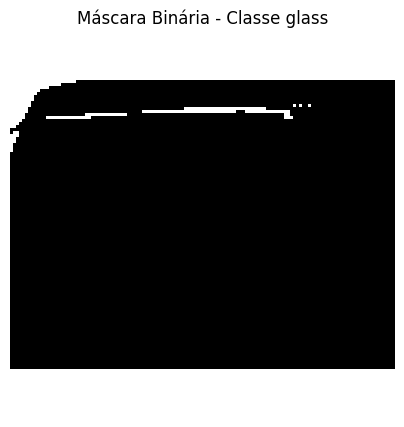

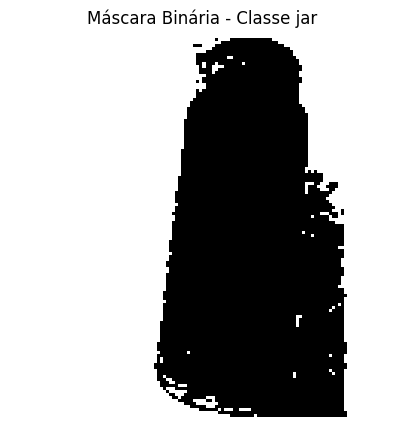

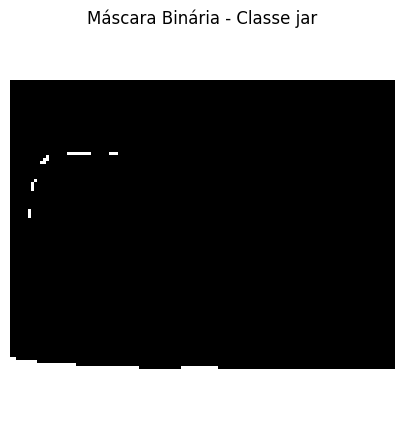

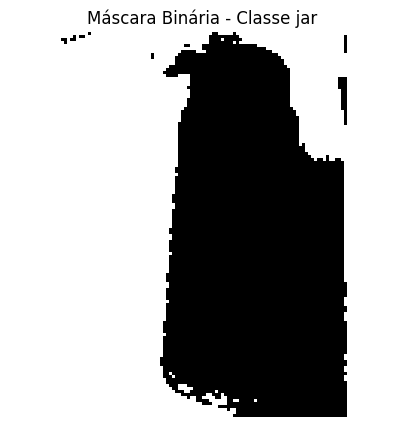

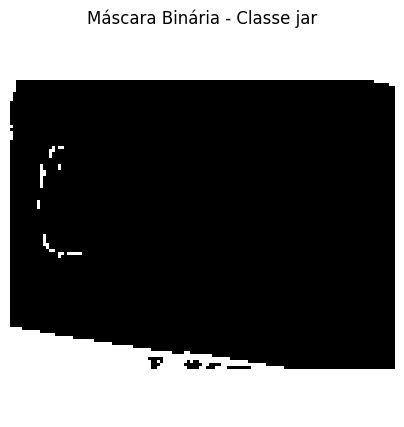

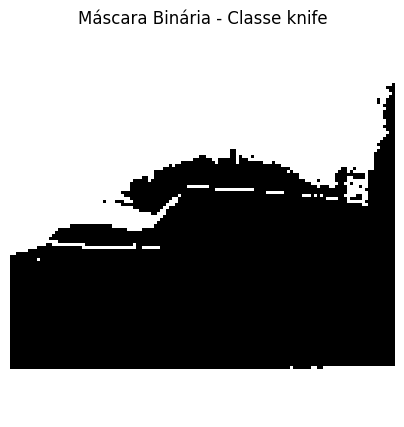

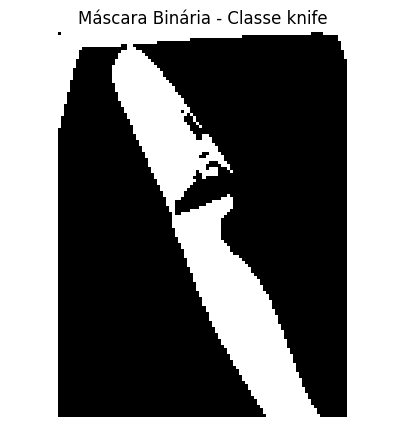

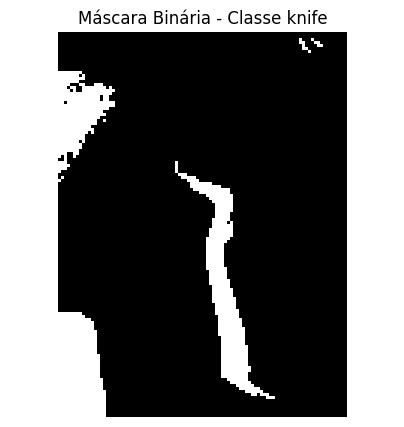

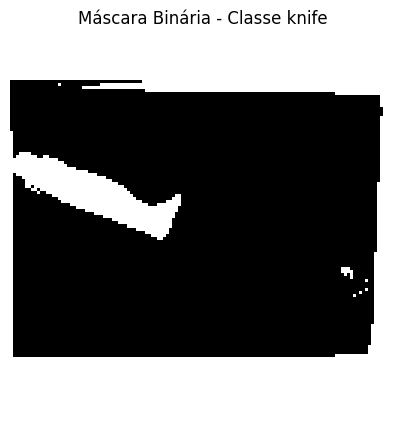

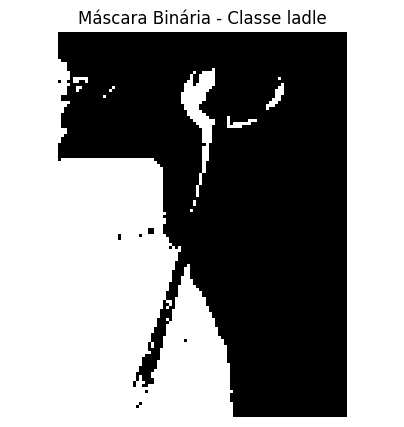

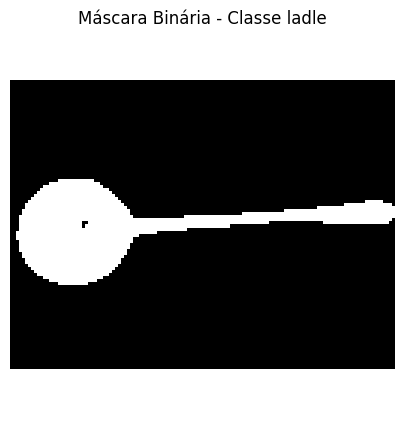

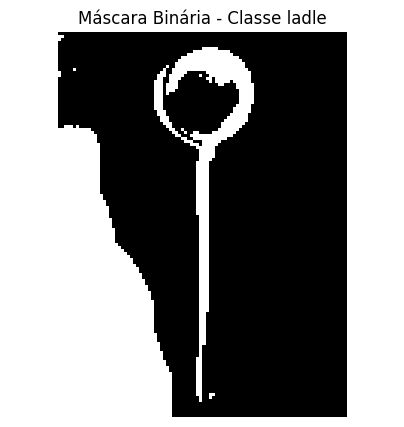

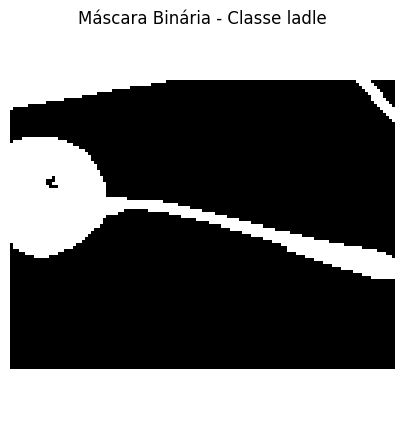

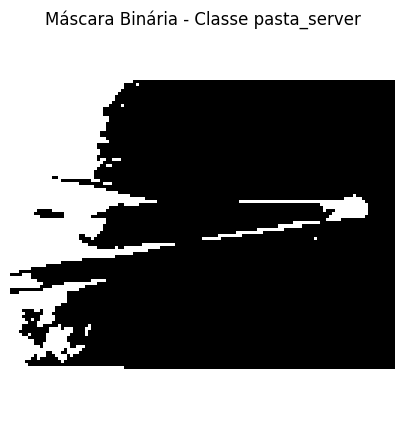

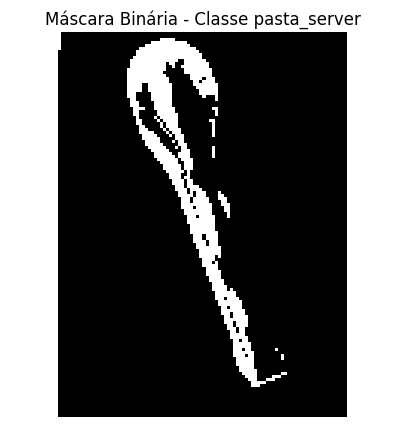

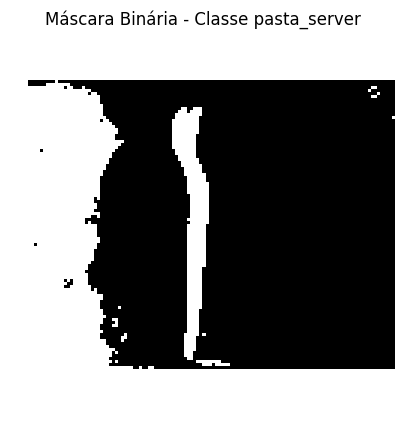

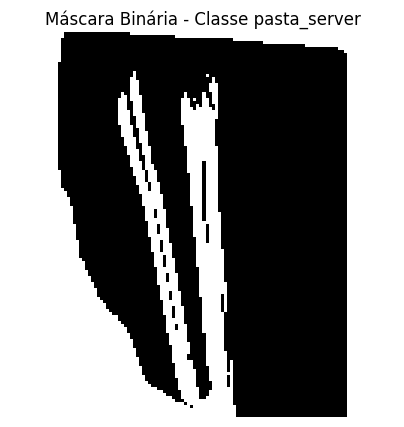

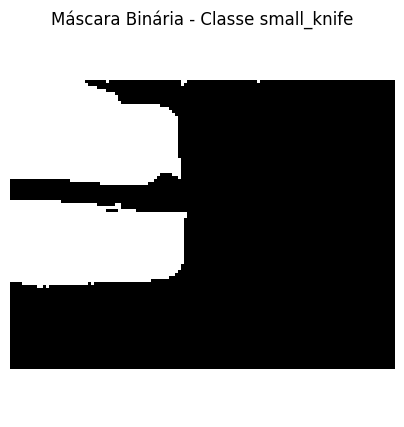

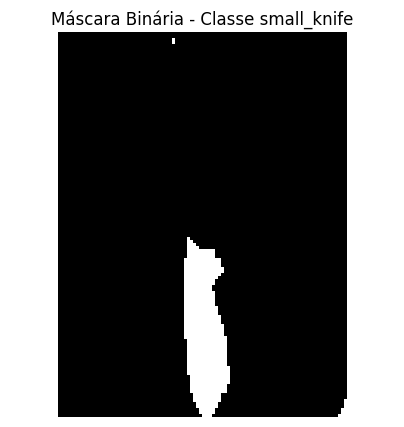

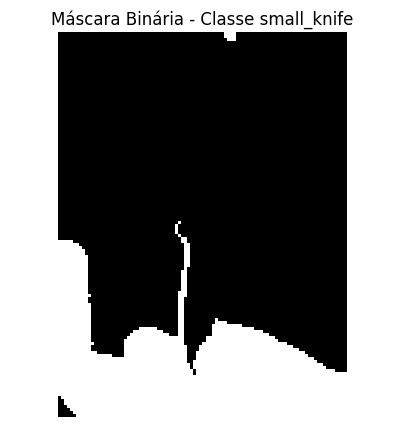

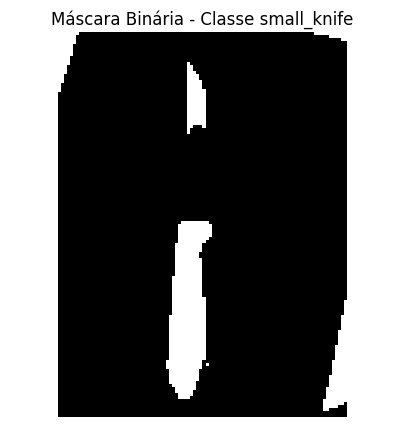

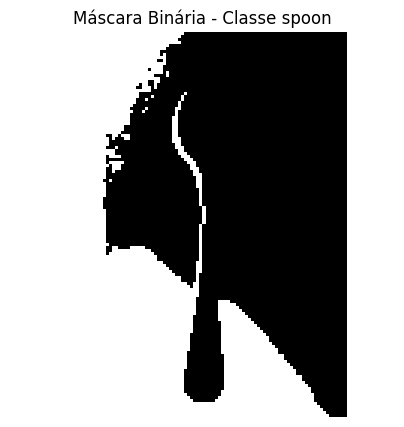

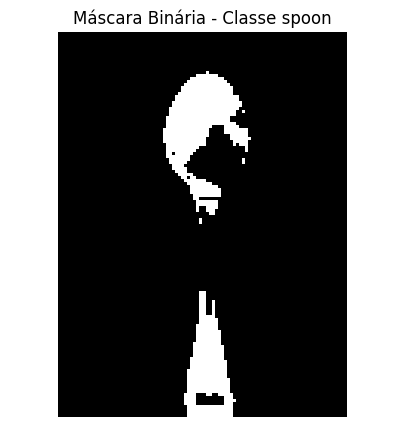

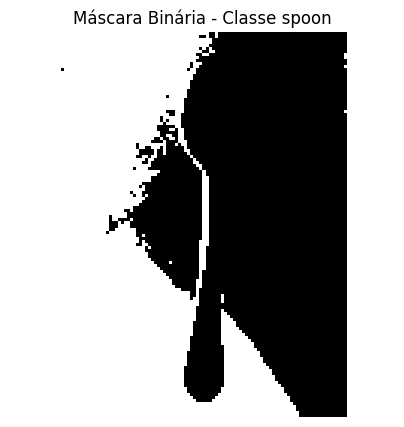

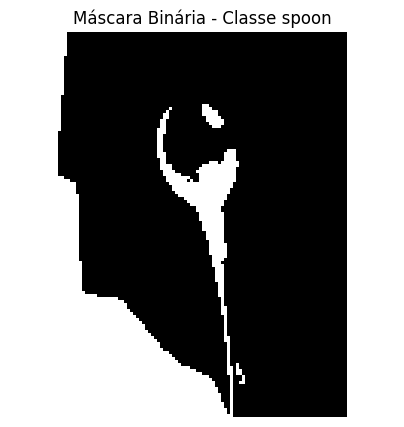

In [5]:
def show_binary_masks(output_dir):
    """
    Exibe as imagens binárias (máscaras) geradas a partir do dataset.

    Args:
        output_dir (str): Diretório que contém as máscaras binárias organizadas por classe.
    """
    for root, dirs, files in os.walk(output_dir):
        for filename in files:
            if filename.lower().endswith(('_mask.png', '_mask.jpg', '_mask.jpeg')):  # Filtrar pelas máscaras
                mask_path = os.path.join(root, filename)
                
                # Carregar a máscara binária
                binary_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                
                # Verificar se a máscara foi carregada corretamente
                if binary_mask is None:
                    print(f"Erro ao carregar a máscara binária: {mask_path}")
                    continue
                
                # Exibir a máscara binária
                class_name = os.path.basename(root)  # Nome da classe
                plt.figure(figsize=(5, 5))
                plt.imshow(binary_mask, cmap='gray')
                plt.title(f'Máscara Binária - Classe {class_name}')
                plt.axis('off')
                plt.show()

# Exemplo de uso
output_dir = 'mascaras_binarias'  # Diretório com as máscaras binárias geradas

show_binary_masks(output_dir)